In [2]:
run plot_recombination_lines_cosmospec.py

ValueError: too many values to unpack (expected 2)

In [3]:
run fit_MS_o8_get_recombination_line_template_v2.py

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(' ')? (fit_MS_o8_get_recombination_line_template_v2.py, line 38)

In [4]:
# Fit to recombination lines template plus foreground model plus CMB
#
# Fit smooth function in log-log space
#
# Compute derivatives and if any zero crossings are deemed present 
# in the range then blow up the chisq if so.
#
# Finally calculate a Markov chain for the parameters of the fit


# *****IMPORTANT*****
# The values of X1 and X2 need to be changed to be the end limits 
# of the frequency range in GHz.
# *****IMPORTANT*****

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.constants
import random as rndm
import math as math
from math import exp, expm1, sqrt
from math import factorial as mf
from scipy.optimize import fmin
from scipy import interpolate
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

PI=scipy.constants.pi
HH=scipy.constants.h
KK=scipy.constants.k
HbK=HH/KK
HbK9=HbK*1.0e9
neg_inf = -np.inf


In [6]:
X1 = 1.0
X2 = 7.0
print (' ')
print ('CAUTION: this version is hard-coded for freq range: ',X1,' to ',X2,' GHz')

X1LOG = np.log10(X1)
X2LOG = np.log10(X2)
XDIF = X1LOG-X2LOG

np.set_printoptions(precision=20)

 
CAUTION: this version is hard-coded for freq range:  1.0  to  7.0  GHz


In [7]:
func1 = lambda p, x, yt: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + yt + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 \
						  )

func11 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 \
						  )

func2 = lambda p, x, yt: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + yt + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2  \
						  )

func22 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) +  \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2  \
						  )

func3 = lambda p, x, yt: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + yt + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3  \
						  )

func33 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3  \
						  )

func4 = lambda p, x, yt: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + yt + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4  \
						  )

func44 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4  \
						  )

In [8]:
chisq11 = lambda p, x, y: sqrt(((func11(p,x)-y)**2).sum()/float(len(x)))

chisq22 = lambda p, x, y: sqrt(((func22(p,x)-y)**2).sum()/float(len(x)))

def chisq33 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func33(p,x)-y)**2).sum()/float(len(x)))

def chisq44 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func44(p,x)-y)**2).sum()/float(len(x)))
	


In [11]:
f = open('spec_to_get_template_6nov15.txt','r')
#f = open('general_data/spec_to_fit_10may14_2pt7e10_30jul14_to_archive_30jul2014_00000.txt', 'r') 
line1 = f.readline()		# read the frequencies in GHz
line1 = line1.strip()
x1 = line1.split()
x1 = np.asfarray(x1)
x1log = np.log10(x1)

# yt = ftemplate(x1)
# yt = np.asfarray(yt)

#print ' '
#print  'Plot the interpolated template'
#plt.plot(x1,yt,c='b')
#plt.xlabel('(f_GHz)')
#plt.ylabel('(T_recline antenna temperature)')
#plt.show()						

# accumulated_scaling_factor = []
# BF = []
irecord=0
#pdf_pages = PdfPages('plot_5sig_o4_no_lines_set3.pdf')
for line2 in f:
#		line2 = f.readline()
		print (" ")
		irecord += 1
		print (" processing record number ",irecord)
		line2 = line2.strip()
		y1 = line2.split()
		y1 = np.asfarray(y1)
		y1log = np.log10(y1)


 
 processing record number  1


In [15]:
p00 = [np.log10(3.0),1.0,-2.5] 

p1 = fmin(chisq11, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#p2 = fmin(chisq1, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#p1 = fmin(chisq1, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
current_chisq = chisq11(p1,x1,y1)
print (" ")
print ("chisq1 = ",current_chisq)
print (10.0**p1[0], p1[1], p1[2])
print (" ")

p00 = [p1[0],p1[1],p1[2],0.0] 
p1 = fmin(chisq22, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq2, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq2, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
final_chisq = chisq22(p1,x1,y1)
print (" ")
print ("chisq2 = ",final_chisq)
print (10.0**p1[0], p1[1], p1[2], p1[3])
print (" ")

p00 = [p1[0],p1[1],p1[2],p1[3],0.0]
p1 = fmin(chisq33, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq3, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq3, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
final_chisq = chisq33(p1,x1,y1)
print (" ")
print ("chisq3 = ",final_chisq)
print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4])
print (" ")

p00 = [p1[0],p1[1],p1[2],p1[3],p1[4],0.0]
p1 = fmin(chisq44, p00, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p2 = fmin(chisq4, p1, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000) 
#		p1 = fmin(chisq4, p2, args=(x1,y1),ftol=1.0e-20,maxiter=50000, maxfun=100000)  
final_chisq = chisq44(p1,x1,y1)
print (" ")
print ("chisq4 = ",final_chisq)
print (10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5])
print (" ")


yfit = func44(p1,x1)  # This fit is of foreground 
yres = y1 - yfit         # This residual is for H0
yres = np.asfarray(yres)



 
chisq1 =  5.963427404719827e-05
2.7256742129001577 0.30538566532800643 -2.5771913151621213
 
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 271
         Function evaluations: 565
 
chisq2 =  6.041359282310978e-07
2.725487122399438 0.30549726260057053 -2.5787270031633156 0.006857991791892939
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 335
         Function evaluations: 680
 
chisq3 =  2.7290850603939873e-08
2.7254810954110975 0.3054978034495376 -2.5786886992873894 0.006662337733470723 0.0004490334210724425
 
 
chisq4 =  8.315517630298941e-09
2.7254800745001746 0.3054980564022774 -2.578689388133255 0.0066889755997021315 0.0003721812477234002 0.00011558137273050766
 


ValueError: 0.8 is not a valid value for color

ValueError: 0.8 is not a valid value for color

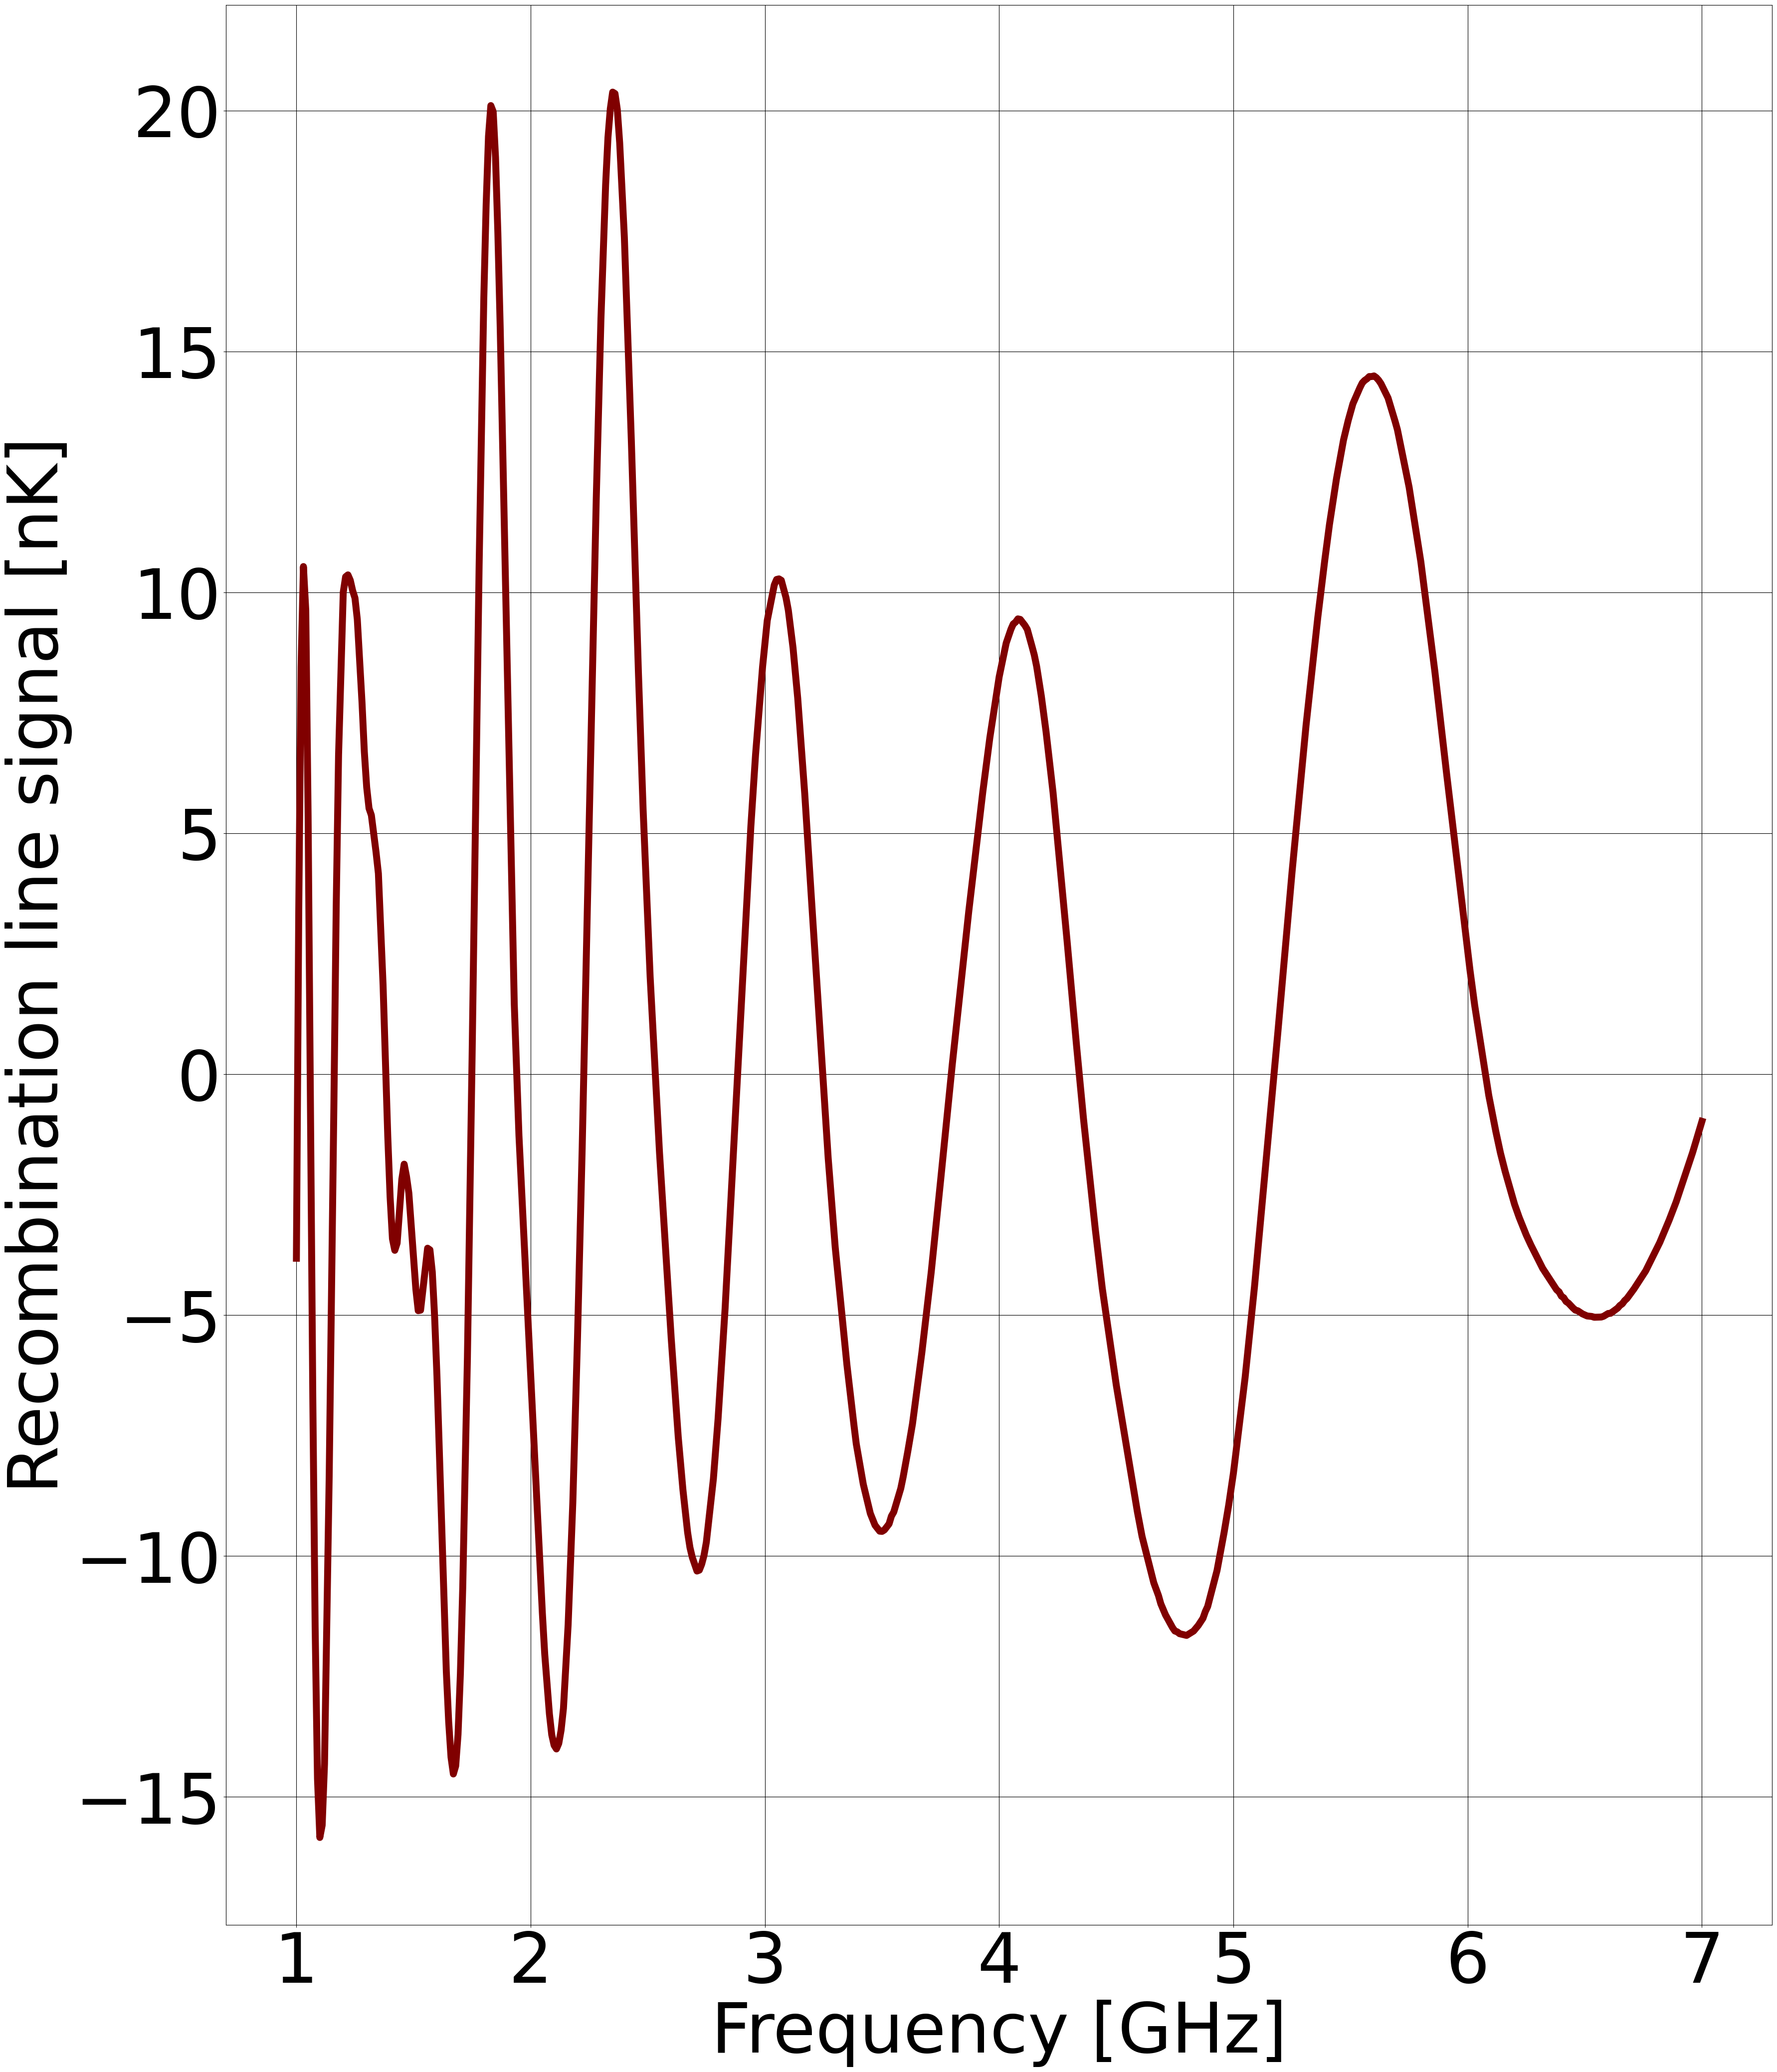

In [38]:
plt.figure(figsize=(40,50))
plt.style.use("fast")
plt.grid(c='black',alpha=1)
plt.plot(x1,yres*1.0e9,linestyle='-',lw=10,c='maroon')
plt.tick_params(axis='both', which='major', labelsize=100)
plt.tick_params(axis='both', which='minor', labelsize=100)
plt.xlabel('Frequency [GHz]',fontsize=100)
plt.ylabel('Recombination line signal [nK]',fontsize=100)
plt.show()